In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal
from scipy.stats import skew
from scipy import integrate
import timeit

In [119]:
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
print(moy)
print(len(moy))

[159.95834255 146.40770359 175.75072277 ... 151.827913   170.97383772
 153.59902061]
10000


L'asymétrie de la distribution d'énergies de moyal est de 1.560293647481061.


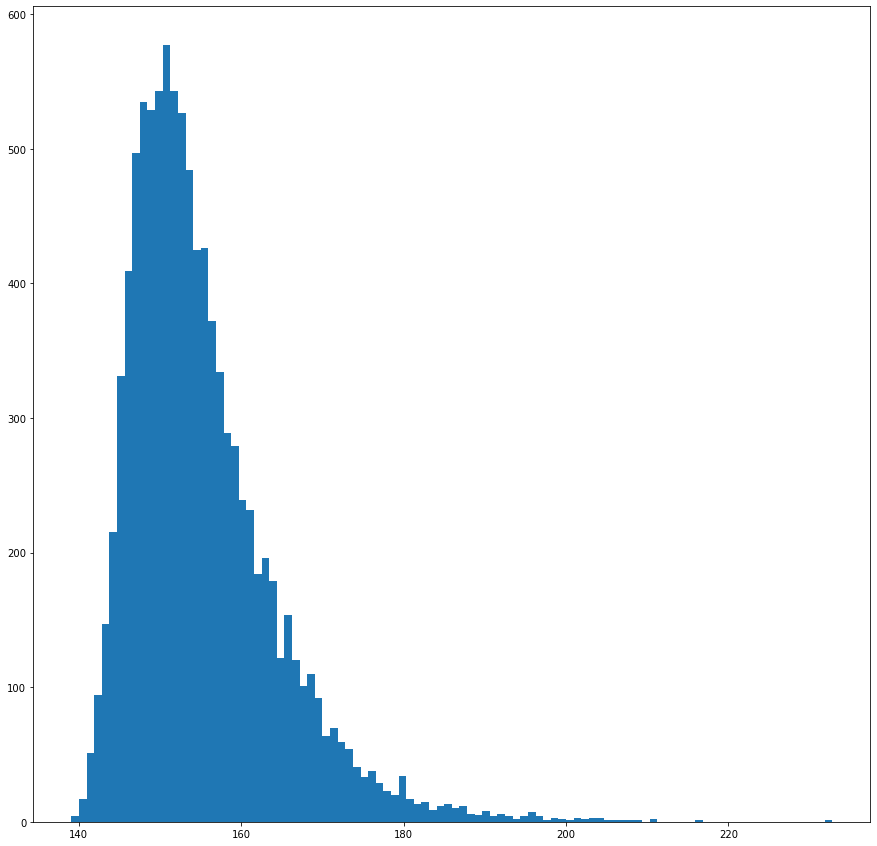

In [109]:
plt.figure(figsize = (15, 15))
plt.hist(moy, bins = 100)
plt.show()
a = skew(moy)
print('''L'asymétrie de la distribution d'énergies de moyal est de '''+str(a)+'.')

Comme on peut le voir dans l'histogramme ci-dessus, la distribution de moyal n'est pas tout à fait symétrique. Nous avons en effet mesuré une asymétrie de la distribution de données de 1.5130775108243748 ce qui indique une présence plus importante de proton ayant une énergie supérieure à la valeur centrale de 150 MeV.

Question 10:

In [ ]:
T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os

def trap_eau(N, E):
    a = 0
    b = E
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def trap_os(N, E):
    a = 0
    b = E
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)
tranches_eau = 2
tranches_os = 2
"""Précision trapèze"""
# while True is True:
#     I_ii = trap_eau(tranches_eau*2)
#     I_i = trap_eau(tranches_eau)
#     eps = (1/3)*(I_ii-I_i)
#     tranches_eau *= 2
#     print(eps)
#     print(tranches_eau)
#     if abs(eps) < 1.48e-8:
#        print('''Le nombre de tranches eau est de '''+ str(2*(tranches_eau-1)))
#        print(trap_eau((tranches_eau-1)*2))
#        print(trap_eau(4355))
#        break
# while True is True:
#     I_ii = trap_os(tranches_os*2)
#     I_i = trap_os(tranches_os)
#     eps = (1/3)*(I_ii-I_i)
#     tranches_os *= 2
#     print(eps)
#     print(tranches_os)
#     if abs(eps) < 1.48e-8:
#        print('''Le nombre de tranches os est de '''+ str(2*(tranches_os-1)))
#        break




'''Romberg eau'''
def romberg_eau(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R
'''Romberg os'''
def romberg_os(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R
print(romberg_eau(3, 150*1.602e-13))
tranches_romberg_eau = 3
tranches_romberg_os = 3

"""Précision romberg"""


lt = []
lr = []
l1 = []
l2 = []
rp = []
r1 = []
r2 = []

# while True is True:
#     end = False
#     start = time.time()
#     n = tranches_romberg_eau
#     tranches_romberg_eau += 1
#     R = romberg_eau(n)
#     # print(R)
#     # print(R[n-1])
#     # print(len(R[n-1]))
#     i = R[n-1]
#     lr.append(i[-2])
#     print(i)
#     eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
#     l2.append(abs(eps))
#     # print(eps, n)
#     if abs(eps) < 1.48e-8:
#         end1 = time.time()
#         print('''Le nombre de tranche avec romberg est '''+str(tranches_romberg_eau-1))
#         print(abs(eps))
#         print(end1 - start)
#         end = True
#     if end:
#         break




# while True is True:
#     end = False
#     start = time.time()
#     n = tranches_romberg_os
#     tranches_romberg_os += 1
#     R = romberg_os(n)
#     # print(R)
#     # print(R[n-1])
#     # print(len(R[n-1]))
#     i = R[n-1]
#     # print(i)
#     eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
#     r2.append(abs(eps))
#     # print(eps, n)
#     if abs(eps) < 1.48e-8:
#         end = time.time()
#         print('''Le nombre de tranche avec romberg est '''+str(tranches_romberg_os-1))
#         print(abs(eps))
#         print(end - start)
#         end = True
#     if end:
#         break





# for x in moy[:10]:
#     print(integrate.quad(f_eau, 0, x*1.602e-13))

La valeur de précision par défaut de la routine scipy.integrate.quad est de 1.49e-8. Il faut donc que le nombre de tranche utilisé pour calculé les portées des protons de moyal soit suffisament élevé pour atteindre cette précision.

Dans la cellule ci-dessous on mesure le temps nécessaire pour calculer la portée des 10000 protons de moyal avec la méthode de Romberg avec une erreur plus petite ou égale à 1.49e-8.

In [157]:
portée_romb = []
for x in moy:
    portée_romb.append(romberg_eau(10,x*1.602e-13)[-1][-2])

C:\Users\louis\AppData\Local\Temp/ipykernel_106484/3915085053.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
C:\Users\louis\AppData\Local\Temp/ipykernel_106484/3915085053.py:28: RuntimeWarning: divide by zero encountered in log
  S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))


10000


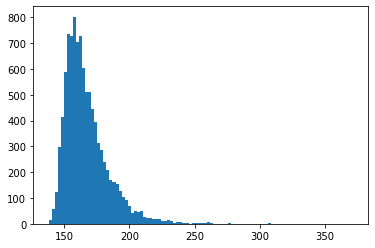

In [160]:
print(len(portée_romb))
plt.hist(np.array(portée_romb), bins=100)
plt.show()

Dans le cellule ci-dessous on mesure le temps nécessaire pour calculer la portée des 10000 protons de moyal avec la fonction scipy.integrate.quad.

In [121]:
portée_quad = []
for x in moy:
    portée_quad.append((integrate.quad(f_eau, 0, x*1.602e-13))[0])


C:\Users\louis\AppData\Local\Temp/ipykernel_106484/1174035871.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  portée_quad.append((integrate.quad(f_eau, 0, x*1.602e-13))[0])
C:\Users\louis\AppData\Local\Temp/ipykernel_106484/1174035871.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  portée_quad.append((integrate.quad(f_eau, 0, x*1.602e-13))[0])


10000


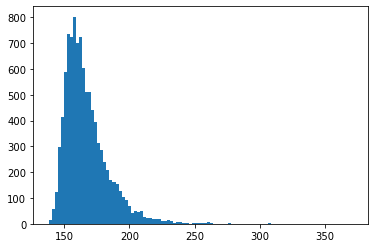

In [161]:
print(len(portée_quad))
plt.hist(np.array(portée_quad), bins=100)
plt.show()

In [151]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def trap_eau(N, E):
    a = 0
    b = E
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def romberg_eau(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(romberg_eau(10,x*1.602e-13)[-1][-2])
'''
 
# timeit statement
print ('''Le temps nécessaire pour calculer la portée des 10000 protons dans l'eau liquide avec la méthode de Romberg est de '''+ str(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1))+'s')

Le temps nécessaire pour calculer la portée des 10000 protons dans l'eau liquide avec la méthode de Romberg est de 77.34562929999083s


In [146]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
def trap_os(N, E):
    a = 0
    b = E
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)
def romberg_os(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(romberg_os(10,x*1.602e-13)[-1][-2])
'''
 
# timeit statement
print ('''Le temps nécessaire pour calculer la portée des 10000 protons dans l'os solide avec la méthode de Romberg est de '''+ str(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1))+'s')

Le temps nécessaire pour calculer la portée des 10000 protons dans l'os solide avec la méthode de Romberg est de 82.44746699999087s


In [152]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
from scipy import integrate
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_quad = []
for x in moy:
    portée_quad.append((integrate.quad(f_eau, 0, x*1.602e-13))[0])
'''
 
# timeit statement
print ('''Le temps nécessaire pour calculer la portée des 10000 protons dans l'eau liquide avec la fonction quad est de '''+ str(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1))+'s')


Le temps nécessaire pour calculer la portée des 10000 protons dans l'eau liquide avec la fonction quad est de 115.86811369998031s


In [150]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
from scipy import integrate
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_quad = []
for x in moy:
    portée_quad.append((integrate.quad(f_os, 0, x*1.602e-13))[0])
'''
 
# timeit statement
print ('''Le temps nécessaire pour calculer la portée des 10000 protons dans l'os solide avec la fonction quad est de '''+ str(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1))+'s')

<timeit-src>:39: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Le temps nécessaire pour calculer la portée des 10000 protons dans l'os solide avec la fonction quad est de 107.01513829999021s
